<a href="https://colab.research.google.com/github/sftSalman/pytorchFundamental/blob/main/AZparctice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch import nn 
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from torchvision.transforms import ToTensor

In [2]:
# loading data from torchvision 

train_data = datasets.FashionMNIST(root='data',
                                   download=True,
                                   train = True,
                                   target_transform = None,
                                   transform=ToTensor())


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(root='data',
                                  train = False,
                                  download = True ,
                                  target_transform = None,
                                  transform = ToTensor()
                                  )


## exploring data 

In [4]:
len(train_data)


60000

In [5]:
len(test_data)

10000

In [6]:
#img , label = train_data[0]
data, label = train_data[0]


In [7]:
data.shape

torch.Size([1, 28, 28])

In [8]:
label

9

In [9]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

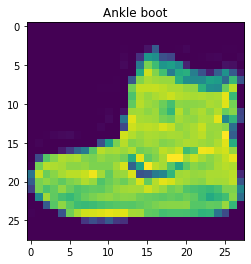

In [10]:
plt.imshow(data.squeeze())
plt.title(train_data.classes[label])

Visulization 

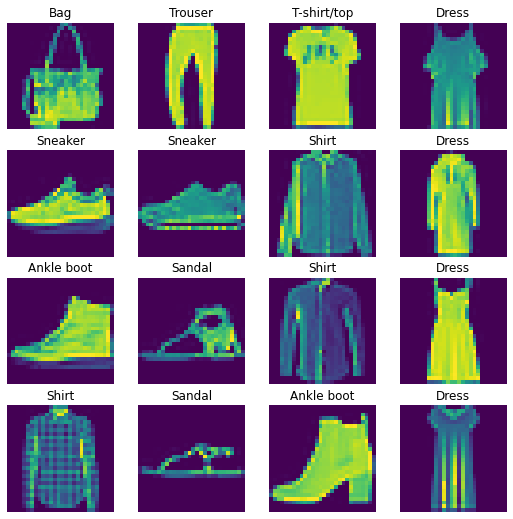

In [11]:
fig = plt.figure(figsize=(9,9))
row , colm = 4,4
for i in range(1,row*colm+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img , name = train_data[random_idx]
  fig.add_subplot(row,colm,i)
  plt.title(train_data.classes[name])
  plt.imshow(img.squeeze())
  plt.axis(False)

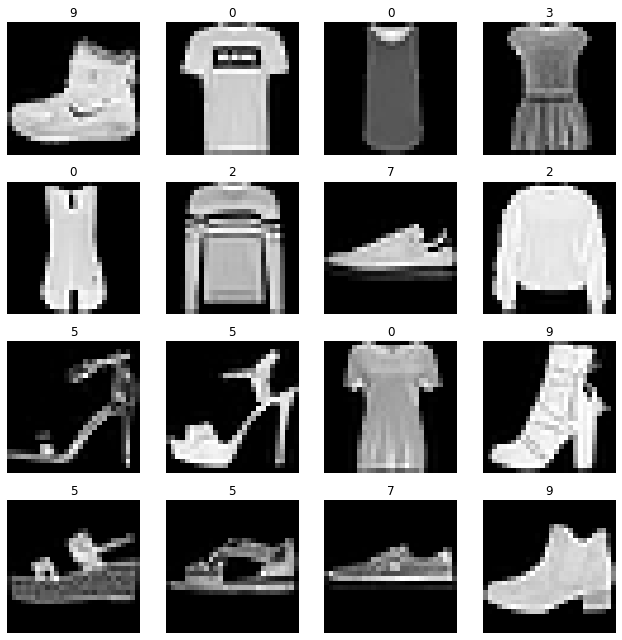

In [12]:
# chatGpt shows this way :
fig, axs = plt.subplots(4, 4, figsize=(9, 9))
for i in range(16):
    img, name = train_data[i]
    row = i // 4
    col = i % 4
    axs[row, col].imshow(img.squeeze(), cmap="gray")
    axs[row, col].set_title(name)
    axs[row, col].axis("off")
plt.tight_layout()
plt.show()


**Making** dataloader 


In [13]:
from torch.utils.data import DataLoader

In [14]:
train_dataLoader = DataLoader(dataset=train_data,
                              batch_size=64,
                              shuffle=True,
                              )

In [15]:
test_dataLoader = DataLoader(dataset=test_data,
                             batch_size= 64,
                             shuffle = False)

In [16]:
train_dataLoader

In [17]:
len(train_dataLoader)

938

In [18]:
len(train_data)

60000

In [19]:
batch = len(train_data)/len(train_dataLoader)

In [20]:
batch

63.96588486140725

In [21]:
#img, label = train_dataLoader[0]

In [22]:
img,label = train_data[0]

In [23]:
b= next(iter(train_dataLoader))

In [24]:
train_iterator = iter(train_dataLoader)
first_batch = next(train_iterator)

In [25]:
#img,label= first_batch[0]

In [26]:
first_batch = next(iter(train_dataLoader))
images, labels = first_batch


(-0.5, 27.5, 27.5, -0.5)

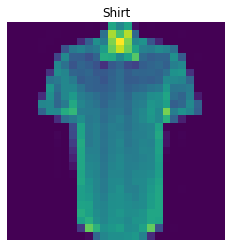

In [27]:
plt.imshow(images[0].squeeze())
plt.title(train_data.classes[labels[0]])
plt.axis(False)

Simple Model

In [29]:
simple_model = nn.Flatten()
output = simple_model(first_batch[0])

In [30]:
output

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [31]:
simple_model

Flatten(start_dim=1, end_dim=-1)

In [32]:
output.shape

torch.Size([64, 784])

In [35]:
first_batch[0].shape

torch.Size([64, 1, 28, 28])

Linear Model

In [36]:
class Linear_model(nn.Module):
  def __init__(self,input, hidden_layer, output):
    super().__init__()
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input,hidden_layer),
        nn.Linear(hidden_layer, output)
    )
  def forward(self,input):
    return self.model(input)


In [48]:
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)


In [49]:
model = Linear_model(784,10,len(train_data.classes))

In [50]:
model.to('cpu')

Linear_model()

In [51]:
print(model)

Linear_model()


In [52]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        print(name, param.grad)

In [53]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model.parameters(),lr=0.1)

ValueError: ignored

In [54]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)


In [55]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model.parameters(),lr=0.1)

ValueError: ignored

In [56]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

# Load data
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())

# Create model, loss function, and optimizer
model = LinearModel(784, 10, 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the model
num_epochs = 10
batch_size = 100

for epoch in range(num_epochs):
    for i in range(0, len(train_data), batch_size):
        images, labels = train_data[i:i+batch_size]
        images = images.view(batch_size, -1)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


NameError: ignored

In [57]:
import torchvision
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

# Load data
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())

# Create model, loss function, and optimizer
model = LinearModel(784, 10, 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the model
num_epochs = 10
batch_size = 100

for epoch in range(num_epochs):
    for i in range(0, len(train_data), batch_size):
        images, labels = train_data[i:i+batch_size]
        images = images.view(batch_size, -1)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



ValueError: ignored

In [58]:
import torchvision
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

# Load data
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())

# Create model, loss function, and optimizer
model = LinearModel(784, 10, 1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the model
num_epochs = 10
batch_size = 100

for epoch in range(num_epochs):
    for i in range(0, len(train_data), batch_size):
        images, labels = train_data[i:i+batch_size]
        images = images.view(batch_size, -1)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs.squeeze(), labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


ValueError: ignored

In [59]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f8a85596af0>, <torch.utils.data.dataloader.DataLoader object at 0x7f8a85596f40>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [60]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [64]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(input_shape, hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(hidden_units,output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [65]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(train_data.classes) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)